In [14]:
import requests
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import torch
import random
import math, time, os
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import numpy as np
import torch
from torch import nn
from torch import optim
from IPython import display
import psutil, gc
# utils.hide_toggle('Imports 2')
from torch.utils.data import Dataset
import sklearn.datasets as skds
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import math
from numpy import sin, pi
from matplotlib import pyplot as plt
from torchvision.datasets import MNIST
import pathlib
from PIL import Image
from PIL.ImageOps import invert
from IPython import display
from time import sleep
import pickle
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('df_synA_test_hard_shuffled_sample.csv',on_bad_lines='skip')


### Target Column

In [16]:
df = pd.read_csv('df_synA_test_hard_shuffled_sample.csv',on_bad_lines='skip')
df = df.dropna()
class_values=list(df.target_5_val.unique())
def encode(v,class_values=class_values):
    return class_values.index(v)
df['era_label']=df['target_5_val'].apply(encode)
df['era_label'].unique()
df_train=df.iloc[0:(len(df)*7)//10]
df_test = df.iloc[(len(df)*7)//10:]
x_train=df_train.iloc[:,0:-6].values
y_train=df_train.iloc[:,-1].values
x_test=df_test.iloc[:,0:-6].values
y_test=df_test.iloc[:,-1].values
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

#### RNN Simple

In [12]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Number of features for input
num_features = x_train.shape[1]

# Number of classes for output layer
num_classes = y_train_encoded.shape[1]

In [6]:
# Building a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, num_features), activation='relu'))  # 50 units in RNN layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Displaying the model summary
model.summary()

/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,055 (15.84 KB)

 Trainable params: 4,055 (15.84 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Building a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, num_features), activation='relu'))  # 50 units in RNN layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
model.fit(x_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 602us/step - accuracy: 0.3837 - loss: 1.8435 - val_accuracy: 0.4703 - val_loss: 1.2727
Epoch 2/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 576us/step - accuracy: 0.4597 - loss: 1.2771 - val_accuracy: 0.4712 - val_loss: 1.2569
Epoch 3/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 574us/step - accuracy: 0.4628 - loss: 1.2657 - val_accuracy: 0.4621 - val_loss: 1.2582
Epoch 4/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 636us/step - accuracy: 0.4687 - loss: 1.2524 - val_accuracy: 0.4907 - val_loss: 1.2229
Epoch 5/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - accuracy: 0.4942 - loss: 1.2052 - val_accuracy: 0.5053 - val_loss: 1.1987
Epoch 6/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 589us/step - accuracy: 0.5103 - loss: 1.1645 - val_accuracy: 0.5149 - val_loss: 1.1517
Epoch 7/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 674us/step - accuracy: 0.5209 - loss: 1.1445 - val_accuracy: 0.5235 - val_loss: 1.1428
Epoch 8/10
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 3s 578us/step - accuracy: 0.5307 -

#### Average Complexity RNN

In [7]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 888us/step - accuracy: 0.4023 - loss: 1.4150 - val_accuracy: 0.5071 - val_loss: 1.1633
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step - accuracy: 0.5120 - loss: 1.1480 - val_accuracy: 0.5242 - val_loss: 1.1156
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 878us/step - accuracy: 0.5466 - loss: 1.0690 - val_accuracy: 0.5536 - val_loss: 1.0689
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 879us/step - accuracy: 0.5635 - loss: 1.0307 - val_accuracy: 0.5603 - val_loss: 1.0436
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5741 - loss: 1.0061 - val_accuracy: 0.5824 - val_loss: 0.9921
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 943us/step - accuracy: 0.5781 - loss: 0.9908 - val_accuracy: 0.5792 - val_loss: 0.9817
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 878us/step - accuracy: 0.5877 - loss: 0.9727 - val_accuracy: 0.5877 - val_loss: 0.9625
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 918us/step - accuracy: 0.5888 - l

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 1, 50)          │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 1, 50)          │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,467 (165.89 KB)

 Trainable params: 14,155 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,312 (110.60 KB)

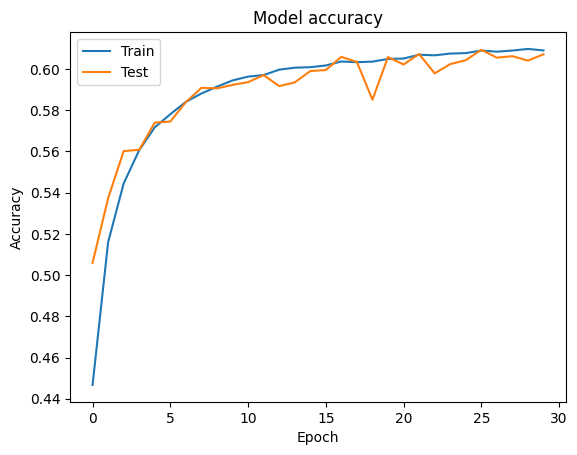

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### LSTM

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First LSTM layer
model.add(LSTM(50, activation='relu'))  # Second LSTM layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.4343 - loss: 1.2866 - val_accuracy: 0.5367 - val_loss: 1.0868
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5502 - loss: 1.0608 - val_accuracy: 0.5731 - val_loss: 1.0150
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5723 - loss: 1.0114 - val_accuracy: 0.5770 - val_loss: 0.9878
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5814 - loss: 0.9802 - val_accuracy: 0.5807 - val_loss: 0.9826
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 987us/step - accuracy: 0.5882 - loss: 0.9649 - val_accuracy: 0.5953 - val_loss: 0.9484
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step - accuracy: 0.5920 - loss: 0.9507 - val_accuracy: 0.5946 - val_loss: 0.9481
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 997us/step - accuracy: 0.5958 - loss: 0.9455 - val_accuracy: 0.5952 - val_loss: 0.9455
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 996us/step - accuracy: 0.5982 - loss: 0

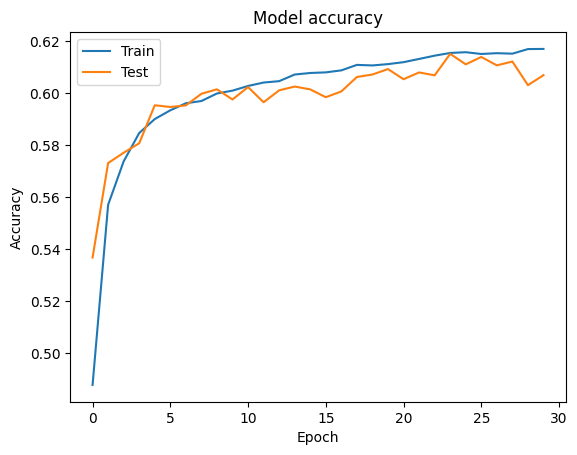

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### LSTM with Dropout and Regularization

Epoch 1/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.3483 - loss: 1.9969 - val_accuracy: 0.2917 - val_loss: 1.4896
Epoch 2/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3453 - loss: 1.4169 - val_accuracy: 0.2405 - val_loss: 1.6860
Epoch 3/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3486 - loss: 1.4113 - val_accuracy: 0.2668 - val_loss: 1.5417
Epoch 4/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3493 - loss: 1.4078 - val_accuracy: 0.3197 - val_loss: 1.4773
Epoch 5/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3491 - loss: 1.4069 - val_accuracy: 0.2862 - val_loss: 1.5040
Epoch 6/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.3468 - loss: 1.4095 - val_accuracy: 0.3795 - val_loss: 1.3719
Epoch 7/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.3027 - loss: 1.4472 - val_accuracy: 0.3115 - val_loss: 1.4547
Epoch 8/20
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.3441 - loss: 1

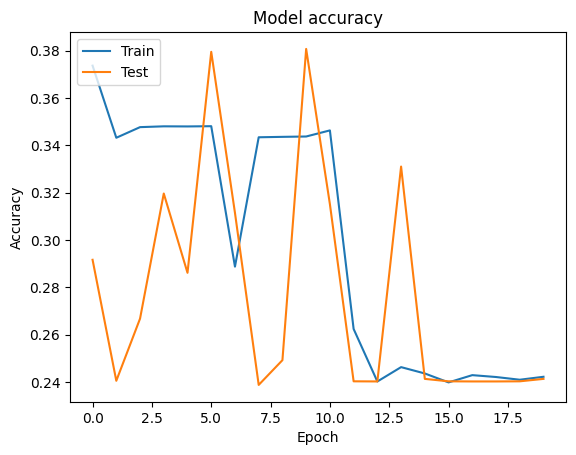

In [11]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(1, num_features), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


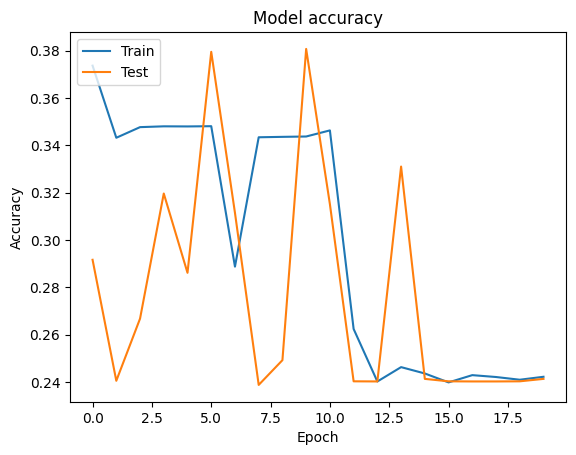

In [12]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Feature selection with RF Classifer (Dropout)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  

In [14]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(Dropout(0.2))  # Dropout layer after the first LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Dropout layer after the second LSTM layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.4338 - loss: 1.3005 - val_accuracy: 0.5157 - val_loss: 1.1222
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5187 - loss: 1.1226 - val_accuracy: 0.5437 - val_loss: 1.0665
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step - accuracy: 0.5343 - loss: 1.0865 - val_accuracy: 0.5611 - val_loss: 1.0348
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5479 - loss: 1.0593 - val_accuracy: 0.5655 - val_loss: 1.0162
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.5553 - loss: 1.0386 - val_accuracy: 0.5699 - val_loss: 1.0054
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.5575 - loss: 1.0314 - val_accuracy: 0.5771 - val_loss: 0.9924
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5642 - loss: 1.0203 - val_accuracy: 0.5776 - val_loss: 0.9874
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5638 - loss: 1.0159 

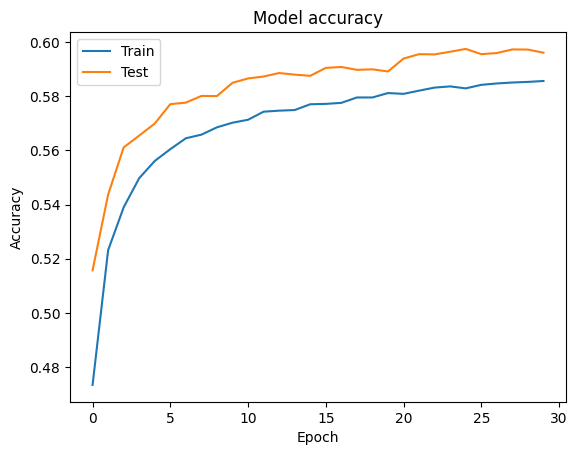

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### LSTM with Feature selection with RF Classifer (No Dropout)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 898us/step - accuracy: 0.4583 - loss: 1.2645 - val_accuracy: 0.5279 - val_loss: 1.1038
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step - accuracy: 0.5362 - loss: 1.0842 - val_accuracy: 0.5513 - val_loss: 1.0503
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 858us/step - accuracy: 0.5589 - loss: 1.0348 - val_accuracy: 0.5663 - val_loss: 1.0175
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 863us/step - accuracy: 0.5702 - loss: 1.0065 - val_accuracy: 0.5768 - val_loss: 0.9949
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 858us/step - accuracy: 0.5742 - loss: 0.9904 - val_accuracy: 0.5805 - val_loss: 0.9851
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 857us/step - accuracy: 0.5806 - loss: 0.9766 - val_accuracy: 0.5802 - val_loss: 0.9772
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 903us/step - accuracy: 0.5865 - loss: 0.9616 - val_accuracy: 0.5858 - val_loss: 0.9699
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 858us/step - accuracy: 0.5875 - loss: 0.95

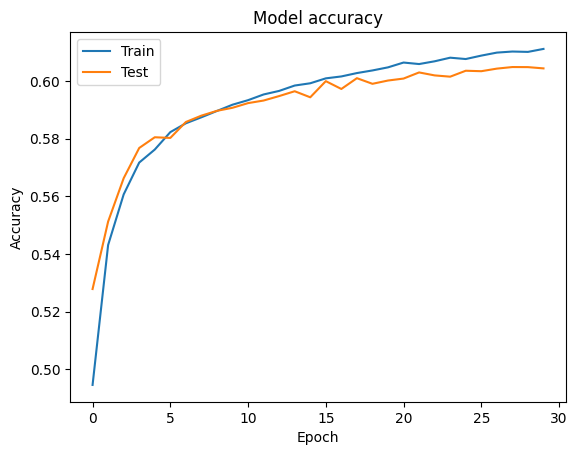

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### RNN with Feature selection with RF Classifer (No Dropout)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

In [20]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.4983 - loss: 1.1731 - val_accuracy: 0.5610 - val_loss: 1.0271
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 885us/step - accuracy: 0.5667 - loss: 1.0085 - val_accuracy: 0.5761 - val_loss: 0.9965
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 812us/step - accuracy: 0.5803 - loss: 0.9772 - val_accuracy: 0.5851 - val_loss: 0.9691
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 812us/step - accuracy: 0.5841 - loss: 0.9663 - val_accuracy: 0.5859 - val_loss: 0.9690
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 810us/step - accuracy: 0.5893 - loss: 0.9525 - val_accuracy: 0.5904 - val_loss: 0.9530
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 799us/step - accuracy: 0.5925 - loss: 0.9428 - val_accuracy: 0.5928 - val_loss: 0.9466
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 821us/step - accuracy: 0.5947 - loss: 0.9377 - val_accuracy: 0.5906 - val_loss: 0.9469
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 802us/step - accuracy: 0.5987 - loss: 0.9295

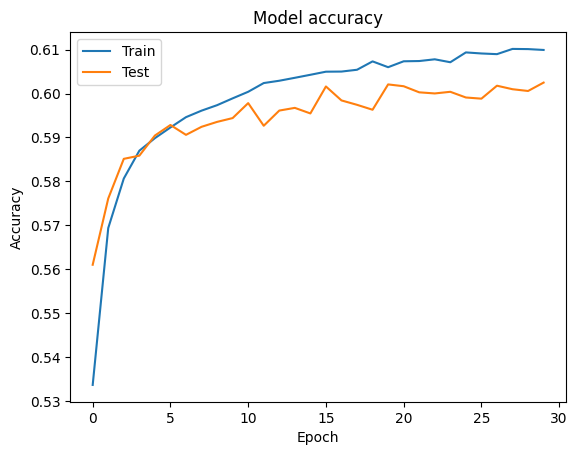

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Era Column

For Era column we only try the best 3 approaches that worked with target columns

In [22]:
df = pd.read_csv('df_synA_test_hard_shuffled_sample.csv',on_bad_lines='skip')
df = df.dropna()
class_values=list(df.era.unique())
def encode(v,class_values=class_values):
    return class_values.index(v)
df['era_label']=df['era'].apply(encode)
df['era_label'].unique()
df_train=df.iloc[0:(len(df)*7)//10]
df_test = df.iloc[(len(df)*7)//10:]
x_train=df_train.iloc[:,0:-6].values
y_train=df_train.iloc[:,-1].values
x_test=df_test.iloc[:,0:-6].values
y_test=df_test.iloc[:,-1].values
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

#### Average Complexity RNN

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 850us/step - accuracy: 0.1617 - loss: 2.3923 - val_accuracy: 0.3188 - val_loss: 1.8880
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 810us/step - accuracy: 0.3576 - loss: 1.7744 - val_accuracy: 0.4098 - val_loss: 1.6159
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step - accuracy: 0.4236 - loss: 1.5729 - val_accuracy: 0.4391 - val_loss: 1.5222
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 806us/step - accuracy: 0.4465 - loss: 1.5088 - val_accuracy: 0.4509 - val_loss: 1.5041
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 812us/step - accuracy: 0.4578 - loss: 1.4718 - val_accuracy: 0.4535 - val_loss: 1.4602
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 803us/step - accuracy: 0.4627 - loss: 1.4478 - val_accuracy: 0.4602 - val_loss: 1.4703
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 826us/step - accuracy: 0.4676 - loss: 1.4300 - val_accuracy: 0.4722 - val_loss: 1.4269
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 798us/step - accuracy: 0.4762 - loss: 1.41

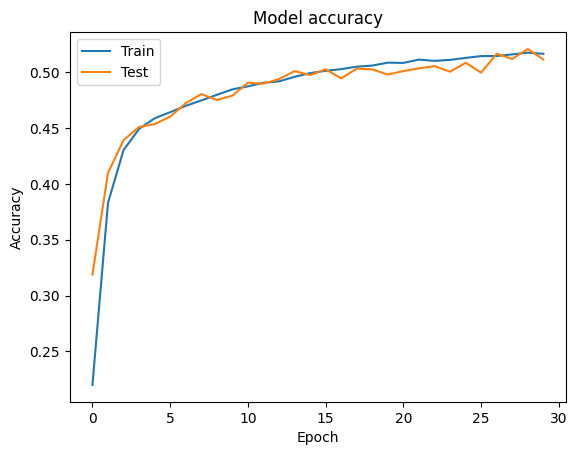

In [23]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


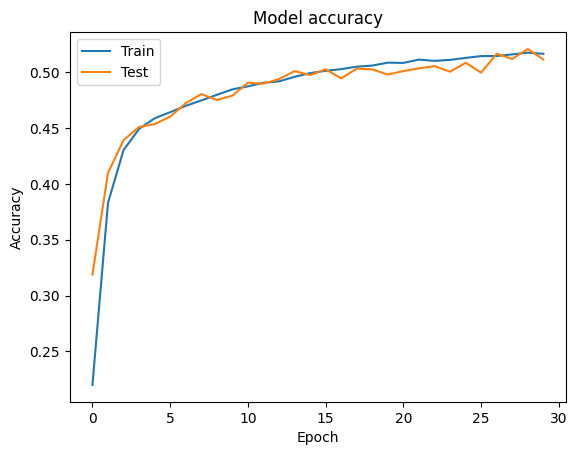

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### RNN with Feaure selections

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'era' with your actual target column name
X = df.drop('era', axis=1).iloc[:, :-6]  # Features
y = df['era']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['era']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - accuracy: 0.3219 - loss: 1.9000 - val_accuracy: 0.4150 - val_loss: 1.6390
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 804us/step - accuracy: 0.4207 - loss: 1.6235 - val_accuracy: 0.4280 - val_loss: 1.5936
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 4s 802us/step - accuracy: 0.4298 - loss: 1.5933 - val_accuracy: 0.4284 - val_loss: 1.5787
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 919us/step - accuracy: 0.4375 - loss: 1.5641 - val_accuracy: 0.4427 - val_loss: 1.5522
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 915us/step - accuracy: 0.4405 - loss: 1.5530 - val_accuracy: 0.4352 - val_loss: 1.5576
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 841us/step - accuracy: 0.4443 - loss: 1.5371 - val_accuracy: 0.4421 - val_loss: 1.5405
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 848us/step - accuracy: 0.4469 - loss: 1.5258 - val_accuracy: 0.4426 - val_loss: 1.5413
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - accuracy: 0.4481 - loss: 1.51

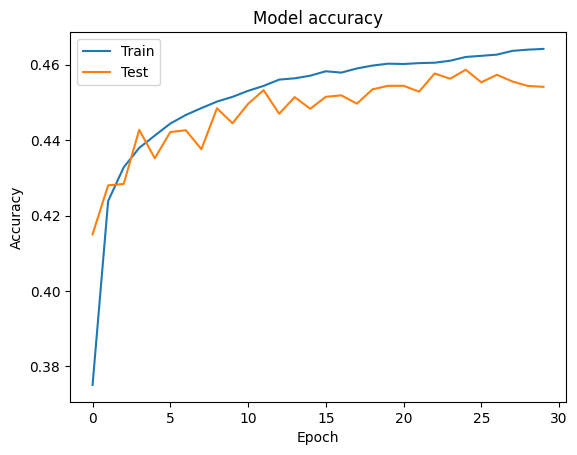

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### LSTM with Feature selection with RF Classifer (No Dropout)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'era' with your actual target column name
X = df.drop('era', axis=1).iloc[:, :-6]  # Features
y = df['era']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['era']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step - accuracy: 0.2773 - loss: 2.0655 - val_accuracy: 0.3981 - val_loss: 1.6917
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - accuracy: 0.4058 - loss: 1.6759 - val_accuracy: 0.4260 - val_loss: 1.6235
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 946us/step - accuracy: 0.4266 - loss: 1.6142 - val_accuracy: 0.4317 - val_loss: 1.5976
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - accuracy: 0.4348 - loss: 1.5916 - val_accuracy: 0.4359 - val_loss: 1.5847
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 894us/step - accuracy: 0.4393 - loss: 1.5739 - val_accuracy: 0.4399 - val_loss: 1.5696
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 883us/step - accuracy: 0.4421 - loss: 1.5676 - val_accuracy: 0.4388 - val_loss: 1.5697
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - accuracy: 0.4417 - loss: 1.5610 - val_accuracy: 0.4428 - val_loss: 1.5557
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 891us/step - accuracy: 0.4469 - loss: 1.55

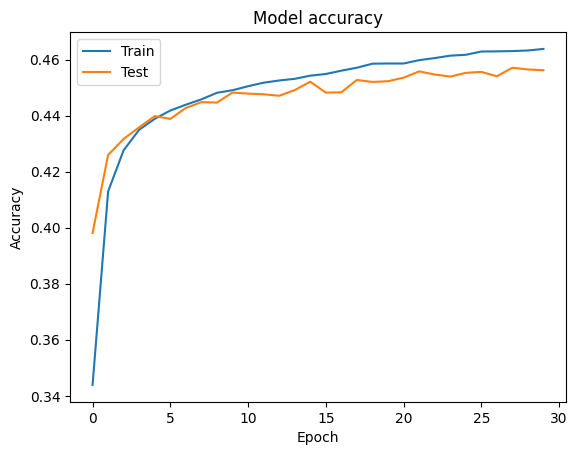

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Simple LSTM

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First LSTM layer
model.add(LSTM(50, activation='relu'))  # Second LSTM layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.4267 - loss: 1.2897 - val_accuracy: 0.5285 - val_loss: 1.1048
Epoch 2/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 981us/step - accuracy: 0.5458 - loss: 1.0692 - val_accuracy: 0.5525 - val_loss: 1.0535
Epoch 3/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5653 - loss: 1.0239 - val_accuracy: 0.5739 - val_loss: 1.0037
Epoch 4/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 973us/step - accuracy: 0.5775 - loss: 0.9938 - val_accuracy: 0.5809 - val_loss: 0.9897
Epoch 5/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 957us/step - accuracy: 0.5819 - loss: 0.9803 - val_accuracy: 0.5889 - val_loss: 0.9635
Epoch 6/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 974us/step - accuracy: 0.5873 - loss: 0.9658 - val_accuracy: 0.5900 - val_loss: 0.9614
Epoch 7/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - accuracy: 0.5878 - loss: 0.9604 - val_accuracy: 0.5934 - val_loss: 0.9509
Epoch 8/30
5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 983us/step - accuracy: 0.5936 - loss: 0.9495 -

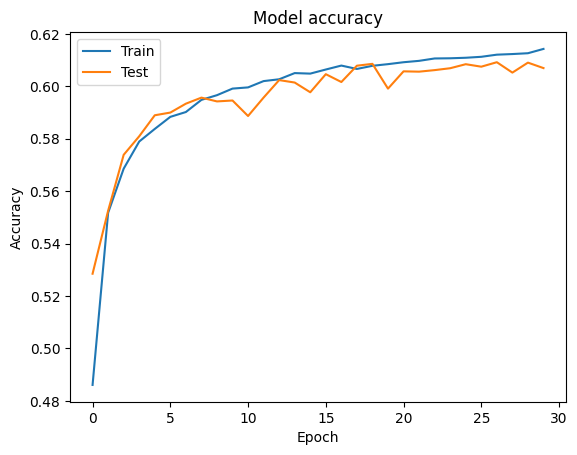

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()